In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

C:\Users\nostw\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


## Import Dataset


In [11]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels,dtype = np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels,dtype = np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [12]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digit

In [13]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' %  (i,test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap = plt.cm.gray_r)
    

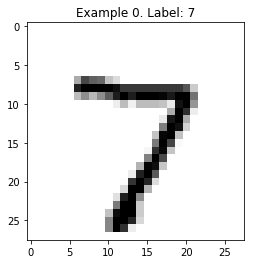

In [14]:
display(0)

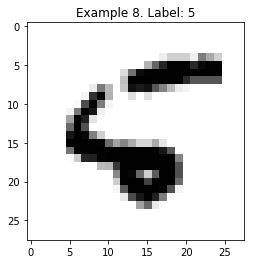

In [15]:
display(8)

In [18]:
print len(data[0])

SyntaxError: invalid syntax (<ipython-input-18-143fe6db913b>, line 1)

## Fit Linear Classifier

In [25]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(n_classes = 10, feature_columns = feature_columns)
classifier.fit(data, labels, batch_size = 100 ,steps = 1000 )

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x0000025A020FA390>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [26]:
classifier.evaluate(test_data,test_labels)

{'accuracy': 0.9137, 'global_step': 1000, 'loss': 0.31026545}

## Classify a few Example

In [31]:
print ("Predicted %d, Label : %d " % (classifier.predict(test_data[0]),test_labels[0]))
display(0)

InvalidArgumentError: tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_INT64, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]

Caused by op 'save/RestoreV2', defined at:
  File "C:\Users\nostw\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nostw\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\nostw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-f1a8e83ebb1f>", line 1, in <module>
    print ("Predicted %d, Label : %d " % (classifier.predict(test_data[0]),test_labels[0]))
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\linear.py", line 537, in predict
    as_iterable=as_iterable)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 497, in new_func
    return func(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\linear.py", line 572, in predict_classes
    as_iterable=as_iterable)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 656, in predict
    iterate_batches=iterate_batches)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 960, in _infer_model
    config=self._session_config))
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 795, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 518, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 981, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 986, in _create_session
    return self._sess_creator.create_session()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 675, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 437, in create_session
    self._scaffold.finalize()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\monitored_session.py", line 212, in finalize
    self._saver = training_saver._get_saver_or_default()  # pylint: disable=protected-access
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 884, in _get_saver_or_default
    saver = Saver(sharded=True, allow_empty=True)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1311, in __init__
    self.build()
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1320, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1357, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 803, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 501, in _AddShardedRestoreOps
    name="restore_shard"))
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 448, in _AddRestoreOps
    restore_sequentially)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 860, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1541, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3290, in create_op
    op_def=op_def)
  File "C:\Users\nostw\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2 = RestoreV2[dtypes=[DT_INT64, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2/tensor_names, save/RestoreV2/shape_and_slices)]]
